In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 25000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 64)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(32))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          1600000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          24832     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,649,729
Trainable params: 1,649,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

25000 Training sequences
25000 Validation sequences


In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history=model.fit(x_train, y_train, batch_size=64, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
391/391 [==============================] - 26s 67ms/step - loss: 0.3859 - accuracy: 0.8191 - val_loss: 0.3103 - val_accuracy: 0.8706
Epoch 2/2
391/391 [==============================] - 25s 65ms/step - loss: 0.1766 - accuracy: 0.9370 - val_loss: 0.3198 - val_accuracy: 0.8678


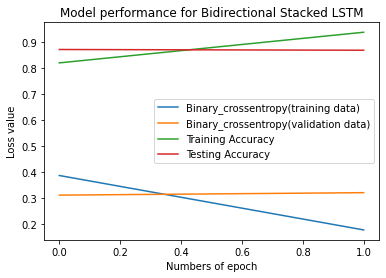

In [ ]:
# Plot history: Binary crossentropy & Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Binary_crossentropy(training data)')
plt.plot(history.history['val_loss'], label='Binary_crossentropy(validation data)')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model performance for Bidirectional Stacked LSTM')
plt.ylabel('Loss value')
plt.xlabel('Numbers of epoch')
plt.legend(loc="center right")
plt.show()